# **Payment Method Trends and Preferences**

### **Problem Steatment**

Perkembangan metode pembayaran yang semakin beragam menuntut perusahaan untuk memahami preferensi dan perilaku pelanggan, terutama selama periode Natal yang menjadi puncak penjualan. Tanpa analisis yang tepat, perusahaan sulit mengetahui metode pembayaran mana yang paling banyak digunakan, nilai transaksi rata-rata per metode, dan tren perubahan preferensi dari waktu ke waktu. Hal ini dapat menghambat kemampuan perusahaan dalam merancang promosi Natal yang efektif, meningkatkan pengalaman belanja pelanggan, serta mendorong loyalitas dan repeat purchase selama musim penjualan yang krusial.


### **Objective**

* Menganalisis distribusi dan preferensi metode pembayaran berdasarkan nilai transaksi.
* Mengidentifikasi tren perubahan penggunaan metode pembayaran dari waktu ke waktu.
* Mengevaluasi pengaruh metode pembayaran terhadap kepuasan dan loyalitas pelanggan.


### **Variabel Yang Tersedia**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---

**1. TransactionID:** adalah nomor unik yang diberikan untuk setiap transaksi.\
**2. Date:** Tanggal transaksi dalam format YYYY-MM-DD.\
**3. Time:** Waktu transaksi dalam format HH:MM:SS.\
**4. CustomerID:** ID unik untuk setiap pelanggan.\
**5. Age:** Usia pelanggan.\
**6. Gender:** Jenis kelamin pelanggan: Male, Female, atau Other.\
**7. Location:** Kota atau daerah tempat transaksi dilakukan.\
**8. StoreID:** ID unik toko fisik (jika pembelian dilakukan secara offline).\
**9. OnlineOrderFlag:** Menunjukkan apakah transaksi dilakukan secara online (True) atau offline (False).\
**10. ProductID:** ID unik dari produk yang dibeli.\
**11. ProductName:** Nama produk yang dibeli.\
**12. Category:** Kategori produk, misalnya: Electronics, Clothing, Toys, Food, Decorations.\
**13. Quantity:** Jumlah unit produk yang dibeli dalam transaksi tersebut.\
**14. UnitPrice:** Harga per unit dari produk yang dibeli.\
**15. TotalPrice:** Total harga produk dalam satu transaksi, dihitung sebagai Quantity × UnitPrice.\
**16. PaymentType:** Jenis metode pembayaran yang digunakan: Credit Card, Debit Card, Cash, atau Online Payment.\
**17. PromotionApplied:** Menunjukkan apakah ada promosi yang diterapkan dalam transaksi tersebut (True atau False).\
**18. DiscountAmount:** Jumlah nominal potongan harga yang diberikan (jika ada).\
**19. GiftWrap:** Menunjukkan apakah produk dibungkus sebagai hadiah (True atau False).\
**20. ShippingMethod:** Metode pengiriman yang digunakan untuk pembelian online, seperti Standard, Express, atau Overnight.\
**21. DeliveryTime:** Lama waktu pengiriman (dalam hari) untuk transaksi online.\
**22. Weather:** Kondisi cuaca saat transaksi berlangsung, seperti Sunny, Rainy, atau Snowy.\
**23. Event:** Acara khusus atau hari besar yang terjadi pada hari transaksi, misalnya Black Friday atau Christmas Market.\
**24. CustomerSatisfaction:** Tingkat kepuasan pelanggan terhadap transaksi, dinilai dari skala 1 hingga 5.\
**25. ReturnFlag:** Menunjukkan apakah produk dikembalikan (True) atau tidak (False).

### **Import Package**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

### **Import Data**

In [2]:
df = pd.read_csv('Christmas Sales.csv', header=0)

In [3]:
pd.set_option('display.max_column',None)

### **Data Understanding**

In [4]:
# DataFrame
df.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,ProductName,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,12/24/2020,7:27:59,441,27,Other,City_15,NaN,True,106,Toys_Product,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,11/18/2022,14:36:39,340,43,Male,City_13,NaN,True,816,Clothing_Product,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,12/26/2019,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing_Product,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,11/13/2018,23:08:08,39,64,Male,City_20,100.0,False,710,Toys_Product,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,12/13/2020,4:38:08,344,26,Other,City_10,90.0,False,687,Toys_Product,Toys,3,57.384041,172.152122,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [5]:
# Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

In [6]:
# Statistika Deskriptif
df.describe().round(2)

,TransactionID,CustomerID,Age,StoreID,ProductID,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction
count,10000.00,10000.00,10000.00,4582.00,10000.00,10000.00,10000.00,10000.00,10000.00,5418.00,10000.00
mean,5000.50,251.93,43.79,50.92,500.23,3.01,54.96,165.43,6.95,3.00,2.98
std,2886.90,145.00,15.37,28.86,288.74,1.40,26.24,116.11,11.08,1.42,1.42
min,1.00,1.00,18.00,1.00,1.00,1.00,10.00,10.02,0.00,1.00,1.00
25%,2500.75,127.00,30.00,26.00,252.00,2.00,32.05,71.90,0.00,2.00,2.00
50%,5000.50,254.00,44.00,51.00,500.00,3.00,55.04,136.29,0.00,3.00,3.00
75%,7500.25,379.00,57.00,76.00,750.00,4.00,77.85,241.05,10.41,4.00,4.00
max,10000.00,500.00,70.00,100.00,1000.00,5.00,100.00,499.98,49.95,5.00,5.00


In [7]:
# Hubungan data dengan missing value
print(df[['CustomerID','OnlineOrderFlag','StoreID','ShippingMethod','DeliveryTime']])

      CustomerID  OnlineOrderFlag  StoreID ShippingMethod  DeliveryTime
0            441             True      NaN       Standard           5.0
1            340             True      NaN        Express           3.0
2             31            False     92.0            NaN           NaN
3             39            False    100.0            NaN           NaN
4            344            False     90.0            NaN           NaN
...          ...              ...      ...            ...           ...
9995         245             True      NaN        Express           4.0
9996         295             True      NaN        Express           5.0
9997         202            False     22.0            NaN           NaN
9998         310             True      NaN        Express           1.0
9999         469             True      NaN      Overnight           2.0

[10000 rows x 5 columns]


Missing value pada kolom StoreID, ShippingMethod, dan DeliveryTime merupakan konsekuensi logis dari jenis transaksi yang terjadi.
* Transaksi online (OnlineOrderFlag = TRUE) secara alami tidak memiliki StoreID karena tidak ada toko fisik yang terlibat.
* Sebaliknya, transaksi yang dilakukan langsung di toko (OnlineOrderFlag = FALSE) tidak memerlukan ShippingMethod dan DeliveryTime karena pelanggan langsung membawa pulang produk yang dibeli.

### **Data Preparation**

In [8]:
# Cek Data Duplicate
df.duplicated().sum()

np.int64(0)

In [9]:
# Cek Missing Value
print(df.isnull().sum())

TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64


In [10]:
# Salin dataframe untuk pembersihan data
df_clean = df.copy()

# Mengganti missing value dengan nilai tertentu
df_clean.fillna({
    'ShippingMethod': 'No Shipping',
    'DeliveryTime': 0,
    'StoreID': 'Online',
    'Event': 'No Event'
}, inplace=True)

# Mengubah tipe data
df_clean = df_clean.astype({
    'TransactionID': str,
    'CustomerID': str,
    'StoreID': str,
    'ProductID': str
})

# Mengubah kolom Date ke format datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Menambahkan kolom Year dan Month
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

# Menghapus kolom redundant (ProductName)
df_clean.drop(columns=['ProductName'], inplace=True)

In [11]:
# Cek transaksi online yang tidak memiliki ShippingMethod
inconsistent_online = df_clean[(df_clean['OnlineOrderFlag'] == True) &
                              (df_clean['ShippingMethod'] == 'No Shipping')]

print(f"Jumlah transaksi online tanpa ShippingMethod: {len(inconsistent_online)}")

Jumlah transaksi online tanpa ShippingMethod: 0


In [12]:
# Cek Konsistensi TotalPrice dengan Quantity dan UnitPrice
CalculatedTotal = df_clean['Quantity'] * df_clean['UnitPrice']
inconsistent_prices = df_clean[abs(df_clean['TotalPrice'] - CalculatedTotal) != 0]

print(f"Jumlah transaksi dengan perhitungan harga tidak konsisten: {len(inconsistent_prices)}")

Jumlah transaksi dengan perhitungan harga tidak konsisten: 6091


In [13]:
# Mengganti seluruh nilai pada TotalPrice dengan CalculatedTotal
df_clean['TotalPrice'] = CalculatedTotal

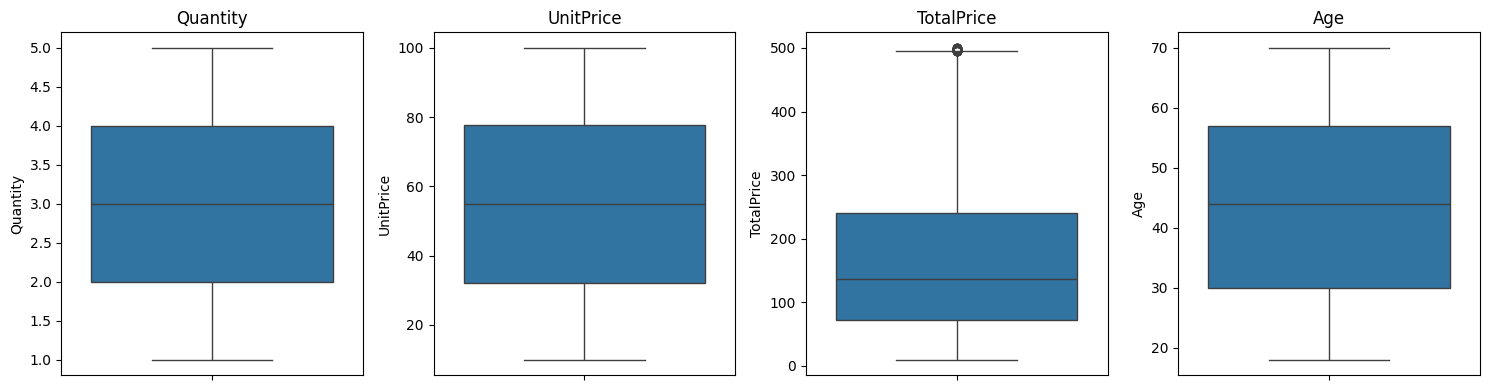

In [14]:
# Cek outlier untuk kolom numerik
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice', 'Age']

plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
print(df_clean.isnull().sum())

TransactionID           0
Date                    0
Time                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
StoreID                 0
OnlineOrderFlag         0
ProductID               0
Category                0
Quantity                0
UnitPrice               0
TotalPrice              0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
GiftWrap                0
ShippingMethod          0
DeliveryTime            0
Weather                 0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
Year                    0
Month                   0
dtype: int64


In [17]:
df_clean.describe().round(2)

,Date,Age,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction,Year,Month
count,10000,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,2021-05-31 23:03:41.760000256,43.79,3.01,54.96,165.43,6.95,1.63,2.98,2020.50,11.5
min,2018-11-01 00:00:00,18.00,1.00,10.00,10.02,0.00,0.00,1.00,2018.00,11.0
25%,2019-12-02 00:00:00,30.00,2.00,32.05,71.90,0.00,0.00,2.00,2019.00,11.0
50%,2021-11-01 00:00:00,44.00,3.00,55.04,136.29,0.00,1.00,3.00,2021.00,12.0
75%,2022-11-30 00:00:00,57.00,4.00,77.85,241.05,10.41,3.00,4.00,2022.00,12.0
max,2023-12-31 00:00:00,70.00,5.00,100.00,499.98,49.95,5.00,5.00,2023.00,12.0
std,NaN,15.37,1.40,26.24,116.11,11.08,1.83,1.42,1.71,0.5


In [66]:
# Menggunakan dataframe penjualan yang hanya berisi transaksi tanpa pengembalian
df_sales = df_clean[df_clean['ReturnFlag'] == False]

###**Persentase Penggunaan Tiap Metode Pembayaran**

In [84]:
# Persentase metode pembayaran per tahun dan metode pembayaran
payment_count_year = df_sales.groupby(['Year', 'PaymentType']).size().unstack(fill_value=0)
payment_percentage_year = payment_count_year.div(payment_count_year.sum(axis=1), axis=0) * 100
payment_percentage_year.style.format('{:,.1f}%')

PaymentType,Cash,Credit Card,Debit Card,Online Payment
Year,,,,
2018,25.8%,25.4%,24.9%,23.9%
2019,29.9%,22.6%,22.0%,25.5%
2020,26.7%,27.5%,22.0%,23.8%
2021,24.3%,23.7%,27.9%,24.0%
2022,25.6%,27.7%,22.0%,24.7%
2023,24.2%,28.1%,23.4%,24.3%


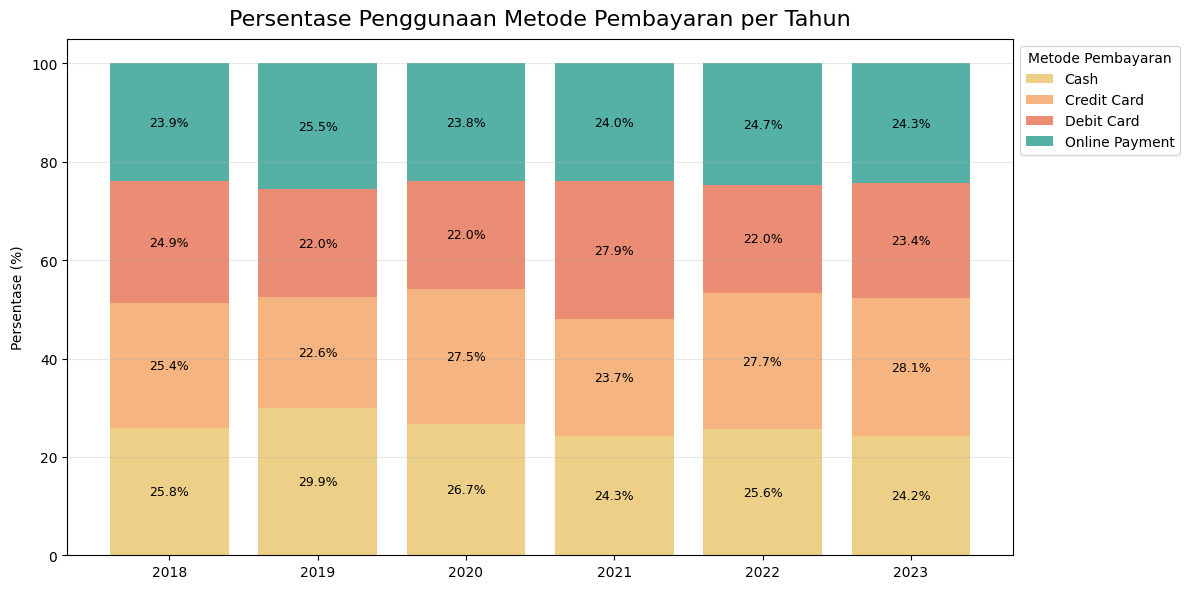

In [85]:
plt.figure(figsize=(12, 6))

# Plot Stacked Bar Chart
bottom = np.zeros(len(payment_percentage_year))
color = ['#E9C46A', '#F4A261', '#E76F51', '#2A9D8F', '#264653']

for i, payment_type in enumerate(payment_percentage_year.columns):
    values = payment_percentage_year[payment_type].values
    plt.bar(payment_percentage_year.index, values, bottom=bottom,
            label=payment_type, color=color[i % len(colors)], alpha=0.8)
    bottom += values

# Tambahkan label persentase
for year in payment_percentage_year.index:
    cumulative = 0
    for payment_type in payment_percentage_year.columns:
        value = payment_percentage_year.loc[year, payment_type]
        if value > 5:
            plt.text(year, cumulative + value/2, f'{value:.1f}%',
                    ha='center', va='center', fontsize=9, color='black')
        cumulative += value

plt.title('Persentase Penggunaan Metode Pembayaran per Tahun', fontsize=16, pad=10)
plt.ylabel('Persentase (%)', labelpad=5)
plt.xlabel('')
plt.legend(title='Metode Pembayaran', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.xticks(payment_percentage_year.index)
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

Tren Pembayaran :
- Sejak 2018, persentase penggunaan pembayaran tunai (cash) menunjukkan tren penurunan, meskipun sempat naik-turun. Di 2018, dominasi pembayaran tunai mencapai 25.8% dan di 2023 menurun menjadi 24.2%.
- Secara keseluruhan, persentase penggunaan metode pembayaran non-tunai (Kartu Kredit, Kartu Debit, dan Pembayaran Online) cenderung konsisten tinggi, mendominasi lebih dari 70% dari total transaksi setiap tahunnya.

Performa Setiap Metode Pembayaran :
- Cash: Persentase relatif stabil dengan sedikit penurunan jangka panjang (25,8% → 24,2%). Indikasi berkurangnya preferensi masyarakat terhadap transaksi tunai.
- Credit Card: Fluktuatif namun cenderung meningkat pada 2020–2023. Dari 25,4% (2018) menjadi 28,1% (2023), menunjukkan kepercayaan konsumen terhadap kartu kredit semakin kuat.
- Debit Card: Paling fluktuatif dibanding metode lain. Sempat turun ke 22% (2019–2020), naik signifikan ke 27,9% (2021), lalu turun lagi ke sekitar 22–23%. Artinya penggunaan kartu debit belum konsisten.
- Online Payment: Relatif stabil di kisaran 23–25% sepanjang periode. Puncak tertinggi di 2019 (25,5%). Ini menandakan adopsi pembayaran online sudah mapan, meski pertumbuhannya stagnan setelah 2020.

###**Nilai Transaksi per Metode Pembayaran**

In [87]:
# Nilai transaksi per metode pembayaran
payment_sales = df_sales.groupby('PaymentType').agg({
    'Quantity':['mean','sum'],
    'TotalPrice':['mean','sum']}).sort_values(by=('TotalPrice','sum'), ascending=False)

payment_sales.columns = ['Rata-Rata Produk','Jumlah Produk','Rata-Rata Penjualan(USD)','Total Penjualan(USD)']
payment_sales = payment_sales.style.format({
    'Rata-Rata Produk':'{:,.2f}',
    'Jumlah Produk':'{:,.0f}',
    'Rata-Rata Penjualan(USD)':'{:,.0f}',
    'Total Penjualan(USD)':'{:,.0f}'})

payment_sales

,Rata-Rata Produk,Jumlah Produk,Rata-Rata Penjualan(USD),Total Penjualan(USD)
PaymentType,,,,
Credit Card,3.04,"3,890",167,"213,840"
Cash,2.97,"3,834",164,"211,449"
Online Payment,2.96,"3,568",163,"196,510"
Debit Card,3.02,"3,543",165,"193,897"


- Kartu Kredit menyumbang total penjualan tertinggi selama periode natal (USD 213,840), sekaligus memiliki nilai transaksi rata-rata (USD 167) dan jumlah item terbanyak (3.04) per transaksi.
-  Tunai (Cash) Masih Sangat Relevan untuk Volume. Meski nilai transaksinya sedikit lebih rendah, Cash adalah kontributor terbesar kedua (USD 211,449). Ini menunjukkan volume transaksi yang sangat tinggi.
- Online Payment memiliki nilai transaksi rata-rata paling rendah (USD 163). Hal ini menunjukkan kecenderungan pelanggan berbelanja online untuk pembelian yang lebih kecil dan sering.
- Keempat metode pembayaran memiliki porsi dan kontribusi yang berimbang tanpa selisih yang signifikan.

###**Tren Frekuensi Transaksi per Metode Pembayaran (Tahunan)**

In [88]:
# Group by Year dan PaymentType
annual_payment = df_sales.groupby(['Year', 'PaymentType']).agg(
    transaction_count=('TransactionID', 'count'),
    total_value=('TotalPrice', 'sum')).reset_index()

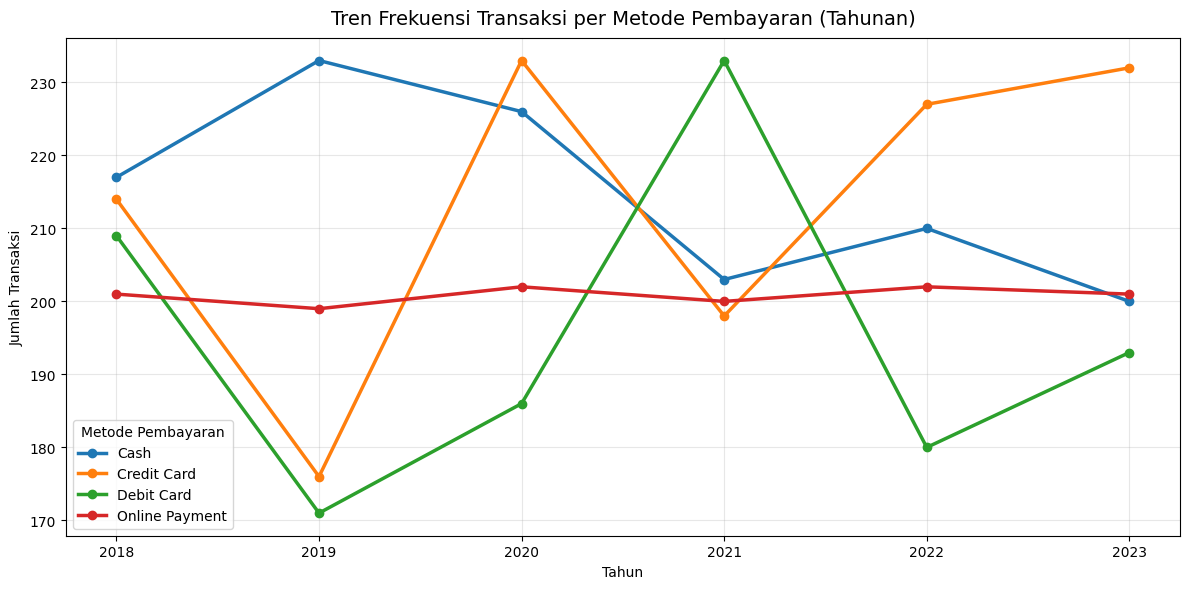


Data Summary - Frekuensi Transaksi:


PaymentType,Cash,Credit Card,Debit Card,Online Payment
Year,,,,
2018,217,214,209,201
2019,233,176,171,199
2020,226,233,186,202
2021,203,198,233,200
2022,210,227,180,202
2023,200,232,193,201


In [89]:
# Plot Frekuensi Transaksi (Jumlah Transaksi)
plt.figure(figsize=(12, 6))

for payment_type in annual_payment['PaymentType'].unique():
    data = annual_payment[annual_payment['PaymentType'] == payment_type]
    plt.plot(data['Year'], data['transaction_count'],
             marker='o', linewidth=2.5, markersize=6, label=payment_type)

plt.title('Tren Frekuensi Transaksi per Metode Pembayaran (Tahunan)', fontsize=14, pad=10)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.legend(title='Metode Pembayaran')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tampilkan data numeriknya
print("\nData Summary - Frekuensi Transaksi:")
freq_table = annual_payment.pivot_table(
    index='Year',
    columns='PaymentType',
    values='transaction_count',
    aggfunc='sum').round(0)

freq_table

- Pembayaran Tunai (Cash) mulai ditinggalkan. Puncak penggunaan tunai terjadi pada 2019, kemudian terus mengalami penurunan hingga 2023.
- Kartu kredit kembali dominan. Setelah penurunan signifikan pada 2019, kartu kredit menunjukkan pemulihan yang kuat sejak 2020 dan menjadi metode pembayaran paling dominan sejak 2022.
- Kartu Debit sangat fluktuatif. Pola penggunaan kartu debit tidak konsisten - turun drastis (2019), melonjak tinggi (2021), kemudian kembali menurun dengan perbaikan minimal di 2023.
- Online Payment stabil tapi stagnan. Menunjukkan konsistensi dalam jumlah transaksi namun tidak menunjukkan pertumbuhan yang signifikan dari tahun ke tahun.

###**Tren Nilai Transaksi per Metode Pembayaran (Tahunan)**

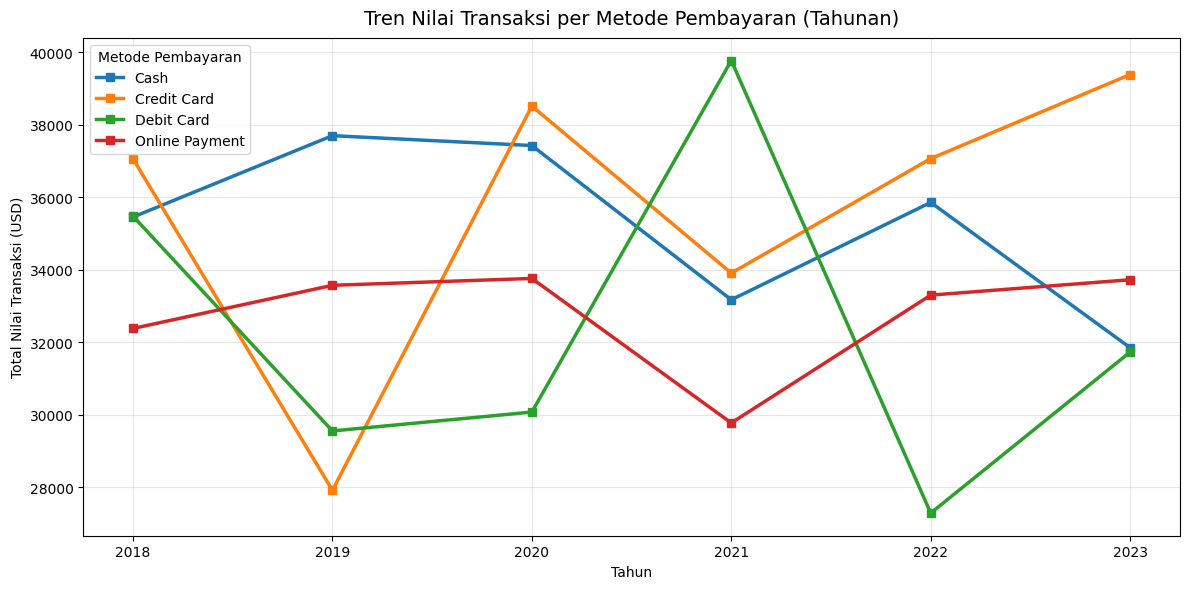


Data Summary - Nilai Transaksi:


PaymentType,Cash,Credit Card,Debit Card,Online Payment
Year,,,,
2018,35452.46,37058.08,35476.98,32380.47
2019,37696.07,27917.97,29555.10,33570.22
2020,37423.76,38511.39,30075.58,33760.15
2021,33171.39,33907.28,39767.79,29775.46
2022,35854.84,37063.56,27290.44,33299.90
2023,31850.70,39382.07,31730.85,33723.51


In [90]:
# Plot Nilai Transaksi (Total Revenue)
plt.figure(figsize=(12, 6))

for payment_type in annual_payment['PaymentType'].unique():
    data = annual_payment[annual_payment['PaymentType'] == payment_type]
    plt.plot(data['Year'], data['total_value'],
             marker='s', linewidth=2.5, markersize=6, label=payment_type)

plt.title('Tren Nilai Transaksi per Metode Pembayaran (Tahunan)', fontsize=14, pad=10)
plt.xlabel('Tahun')
plt.ylabel('Total Nilai Transaksi (USD)')
plt.legend(title='Metode Pembayaran')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Tanpilkan data numeriknya
print("\nData Summary - Nilai Transaksi:")
value_table = annual_payment.pivot_table(
    index='Year',
    columns='PaymentType',
    values='total_value',
    aggfunc='sum').round(2)

value_table

- Kartu Kredit menjadi penggerak pendapatan utama dan yang paling konsisten. Nilai transaksinya terus menunjukkan tren positif sejak 2021 dan menjadi yang tertinggi pada 2023 (USD 39,382), membuktikan bahwa metode ini sangat efektif untuk transaksi bernilai besar.
- Tunai (Cash) masih signifikan namun nilainya terus menurun dalam lima tahun terakhir. Penurunan dari USD 37,696 (2019) menjadi USD 31,851 (2023) mengonfirmasi bahwa tren menjauhi pembayaran konvensional, meskipun volumenya masih tinggi.
- Kartu Debit sangat tidak stabil dan cenderung turun, menandakan relevansinya semakin berkurang. Penurunan drastis pada 2022 (USD 27,290) dan pemulihan yang lemah di 2023 (USD 31,731) menunjukkan bahwa pelanggan mungkin beralih ke metode yang lebih modern.
- Online Payment stagnan dan tidak menunjukkan pertumbuhan nilai transaksi yang berarti. Nilainya tetap berada di kisaran USD 33,000 - USD 34,000 sejak 2019, menunjukkan bahwa metode ini belum berhasil mendorong pembelian dengan nilai lebih tinggi.
- Secara keseluruhan, terjadi pergeseran nilai ekonomi dari tunai ke kartu kredit. Kartu kredit kini tidak hanya dominan dalam frekuensi, tetapi juga menyumbang nilai transaksi terbesar, menjadikannya pilar paling kritis bagi pendapatan.

###**Rata-rata Customer Satisfaction per Metode Pembayaran**

In [76]:
# Rata-rata CustomerSatisfaction per Metode Pembayaran
satisfaction_by_payment = df_sales.groupby('PaymentType')['CustomerSatisfaction'].\
                          agg(['mean','count','std']).round(2).sort_values('mean', ascending=False)

satisfaction_by_payment

,mean,count,std
PaymentType,,,
Cash,3.02,1289,1.41
Online Payment,3.02,1205,1.46
Debit Card,3.00,1172,1.43
Credit Card,2.97,1280,1.41


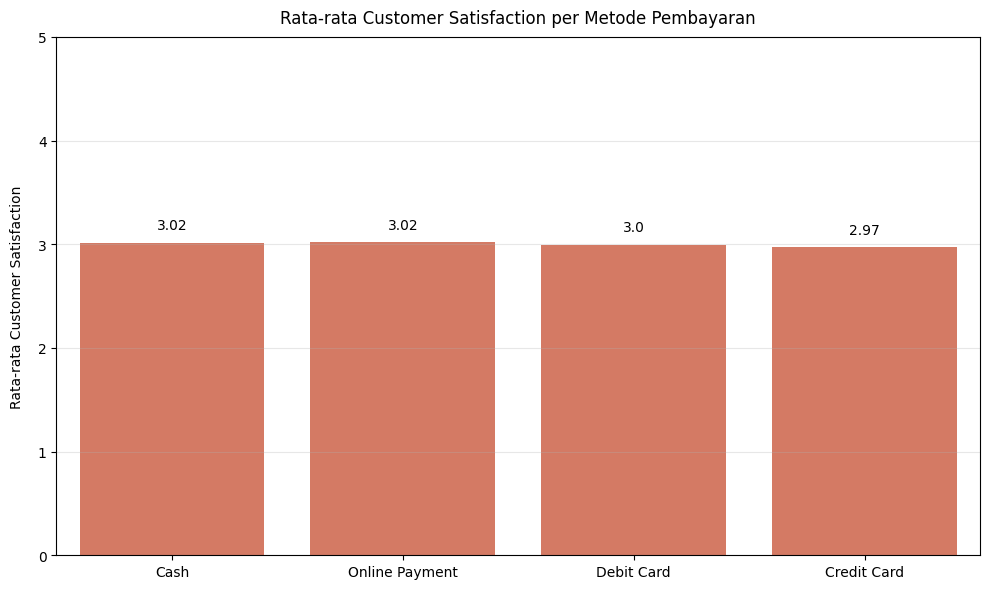

In [83]:
# Visualisasi
plt.figure(figsize=(10, 6))

sns.barplot(data=df_sales,
            x='PaymentType',
            y='CustomerSatisfaction',
            estimator='mean',
            errorbar=None,
            color='#E76F51',
            order=satisfaction_by_payment.index)

plt.title('Rata-rata Customer Satisfaction per Metode Pembayaran', pad=10)
plt.ylabel('Rata-rata Customer Satisfaction', labelpad=10)
plt.xlabel('')
plt.ylim(0, 5)
plt.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for i, (payment, row) in enumerate(satisfaction_by_payment.iterrows()):
    plt.text(i, row['mean'] + 0.1, f'{row["mean"]}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

- Tingkat kepuasan pelanggan hampir sama untuk semua metode pembayaran, dengan perbedaan yang sangat kecil. Selisih antara metode tertinggi dan terendah hanya 0.05 poin, menunjukkan bahwa pemilihan metode pembayaran tidak secara signifikan mempengaruhi kepuasan pelanggan.
- Cash dan Online Payment sedikit lebih unggul dalam kepuasan pelanggan. Kedua metode ini mendapatkan skor 3.02, menunjukkan bahwa pelanggan merasa paling nyaman dengan pembayaran tunai dan digital.
- Credit Card memiliki tingkat kepuasan yang sedikit lebih rendah. Dengan skor 2.97, kartu kredit memiliki tingkat kepuasan yang secara marginal lebih rendah, mungkin terkait dengan kekhawatiran keamanan atau proses verifikasi yang lebih rumit.

### **Kesimpulan**

Berdasarkan hasil analisis, dapat disimpulkan bahwa terjadi pergeseran signifikan dari metode pembayaran konvensional menuju non-tunai, terutama kartu kredit. Meskipun cash masih relevan dalam hal volume transaksi, tren penggunaannya menunjukkan penurunan baik dari sisi frekuensi maupun nilai transaksi, menandakan masyarakat semakin meninggalkan pembayaran tunai. Kartu kredit berhasil menjadi pilar utama dalam sistem pembayaran dengan dominasi baik pada frekuensi maupun nilai transaksi, terutama sejak 2022, menjadikannya penggerak pendapatan yang paling konsisten dan bernilai tinggi. Sebaliknya, kartu debit menunjukkan performa yang sangat fluktuatif dengan kontribusi yang cenderung menurun, mengindikasikan berkurangnya relevansi metode ini. Sementara itu, online payment relatif stabil namun stagnan, dengan kontribusi nilai transaksi yang rendah dan tidak mengalami pertumbuhan berarti dari tahun ke tahun.

Dari sisi kepuasan pelanggan, semua metode pembayaran menunjukkan tingkat kepuasan yang relatif setara, dengan cash dan online payment sedikit lebih unggul dibanding metode lainnya. Hal ini memperlihatkan bahwa meskipun kartu kredit mendominasi nilai ekonomi, preferensi pelanggan terhadap kenyamanan tetap terbagi, sehingga perusahaan perlu menjaga keseimbangan dalam menyediakan beragam opsi pembayaran untuk mempertahankan loyalitas pelanggan.

Saran pengembangan ke depan:

- Optimalisasi kartu kredit sebagai pilar pendapatan. Perusahaan dapat memperkuat kolaborasi dengan bank penerbit untuk menghadirkan promo eksklusif, cicilan fleksibel, atau program loyalitas berbasis poin.

- Mendorong pertumbuhan Online Payment. Perusahaan dapat meningkatkan daya tariknya dengan integrasi teknologi pembayaran yang lebih seamless (misalnya QRIS, e-wallet, atau pay-later) serta bundling diskon atau cashback untuk transaksi online, sehingga dapat meningkatkan nilai rata-rata pembelian.

- Revitalisasi penggunaan Debit Card. Fluktuasi tinggi pada debit card menandakan ketidakstabilan preferensi pelanggan. Diperlukan strategi reaktivasi, misalnya melalui kerja sama dengan bank untuk menghadirkan promo spesifik, edukasi manfaat penggunaan debit, serta peningkatan keamanan transaksi agar lebih dipercaya pelanggan.

- Manajemen transisi dari Cash. Meskipun tren cash menurun, segmen pelanggan tertentu masih bergantung pada metode ini. Perusahaan sebaiknya tidak langsung menghilangkannya, melainkan secara bertahap mengedukasi pelanggan tentang kelebihan non-tunai sambil tetap menjaga pengalaman positif bagi pengguna tunai.

- Fokus pada customer experience dan kepuasan. Karena tingkat kepuasan relatif setara di semua metode, peluang terbesar adalah diferensiasi melalui kenyamanan dan keamanan. Peningkatan kecepatan proses pembayaran, transparansi biaya, serta perlindungan data dapat menjadi faktor kunci untuk menjaga loyalitas pelanggan.